In [1]:
import numpy as np
import pandas as pd
import time
import os
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ExpW

In [90]:
frame = pd.read_csv('ExpW_OpenFace_result_with_expression_gender_race_age.csv')
frame.head()

,ImageName,Expression,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,confidence,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,angry_actor_104_0.jpg,0,Black,Male,20-29,[0.01164725 0.5489195 0.06282789 0.03017501 0...,[0.97893476 0.02106526],[0.00264865 0.03285832 0.07209051 0.29417548 0...,0.0,0.875,...,0.00,0.41,3.61,0.54,1.10,0.68,0.00,2.23,0.00,0.17
1,angry_actor_109_0.jpg,0,Middle Eastern,Male,10-19,[0.07172439 0.03716405 0.07634144 0.09301798 0...,[0.9886888 0.01131118],[5.5791729e-04 2.5763142e-01 4.3460685e-01 2.5...,0.0,0.925,...,1.16,0.76,0.77,1.12,0.04,1.38,0.00,1.20,0.00,0.00
2,angry_actor_120_1.jpg,2,White,Male,20-29,[0.38725546 0.02379545 0.04428627 0.3587341 0...,[0.7577495 0.24225047],[0.00361199 0.02466666 0.0458126 0.62581354 0...,1.0,0.925,...,0.06,0.00,1.51,0.00,0.00,0.00,0.00,1.09,0.51,0.10
3,angry_actor_13_0.jpg,3,East Asian,Female,20-29,[0.05252786 0.06977403 0.0932842 0.40103135 0...,[0.46038443 0.5396156 ],[0.00304344 0.0880671 0.22934933 0.39468738 0...,0.0,0.975,...,0.99,0.00,0.00,0.36,0.56,0.00,0.13,0.96,1.02,0.00
4,angry_actor_132_0.jpg,0,White,Female,20-29,[0.29344454 0.09408408 0.14308809 0.2740257 0...,[0.44868255 0.55131745],[0.00321869 0.0189087 0.0630689 0.40079823 0...,0.0,0.875,...,0.05,0.00,0.13,0.00,0.76,0.00,0.25,0.00,0.06,0.00


In [91]:
frame.loc[frame['Expression'] == 0, 'Expression'] = 'angry'
frame.loc[frame['Expression'] == 1, 'Expression'] = 'disgust'
frame.loc[frame['Expression'] == 2, 'Expression'] = 'fear'
frame.loc[frame['Expression'] == 3, 'Expression'] = 'happy'
frame.loc[frame['Expression'] == 4, 'Expression'] = 'sad'
frame.loc[frame['Expression'] == 5, 'Expression'] = 'surprise'
frame.loc[frame['Expression'] == 6, 'Expression'] = 'neutral'
frame.Expression.value_counts()

neutral     33927
happy       28893
sad         10429
surprise     6880
disgust      3805
angry        3602
fear         1064
Name: Expression, dtype: int64

In [92]:
frame['Angry'] = (frame['Expression'] =='angry').astype(int)
frame['Disgust'] = (frame['Expression'] == 'disgust').astype(int)
frame['Fear'] = (frame['Expression'] == 'fear').astype(int)
frame['Happy'] = (frame['Expression'] =='happy').astype(int)
frame['Sad'] = (frame['Expression'] == 'sad').astype(int)
frame['Surprise'] = (frame['Expression'] == 'surprise').astype(int)
frame['Neutral'] = (frame['Expression'] == 'neutral').astype(int)

In [93]:
frame = frame.dropna()
frame.shape

(85355, 188)

In [94]:
frame.age_preds.value_counts()

20-29           51484
30-39           11138
3-9              5994
40-49            5615
10-19            5147
more than 70     2601
60-69            2538
0-2               420
50-59             418
Name: age_preds, dtype: int64

In [95]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

# ExpW expression label：
- "0" "angry"
- "1" "disgust"
- "2" "fear"
- "3" "happy"
- "4" "sad"
- "5" "surprise"
- "6" "neutral"

In [96]:
frame.loc[frame['Expression'] == 0, 'Expression'] = 'angry'
frame.loc[frame['Expression'] == 1, 'Expression'] = 'disgust'
frame.loc[frame['Expression'] == 2, 'Expression'] = 'fear'
frame.loc[frame['Expression'] == 3, 'Expression'] = 'happy'
frame.loc[frame['Expression'] == 4, 'Expression'] = 'sad'
frame.loc[frame['Expression'] == 5, 'Expression'] = 'surprise'
frame.loc[frame['Expression'] == 6, 'Expression'] = 'neutral'
frame.Expression.value_counts()

neutral     32384
happy       28252
sad          9853
surprise     6666
disgust      3719
angry        3494
fear          987
Name: Expression, dtype: int64

In [97]:
frame['Angry'] = (frame['Expression'] =='angry').astype(int)
frame['Disgust'] = (frame['Expression'] == 'disgust').astype(int)
frame['Fear'] = (frame['Expression'] == 'fear').astype(int)
frame['Happy'] = (frame['Expression'] =='happy').astype(int)
frame['Sad'] = (frame['Expression'] == 'sad').astype(int)
frame['Surprise'] = (frame['Expression'] == 'surprise').astype(int)
frame['Neutral'] = (frame['Expression'] == 'neutral').astype(int)

In [98]:
frame = frame.dropna()
frame.shape

(85355, 188)

# Using the optimal threshold to re-create the AU presence

In [99]:
AU_intensity_OpenFace_common2 = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU09_r', 'AU10_r', 
                'AU12_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU25_r', 'AU26_r']
optimal_threshold = np.array([4.4, 4.8, 2.4, 3.7, 1.8, 2.8, 0.2, 1.3, 1.3, 5. , 5. , 0.7, 5. ])
for i in range(len(AU_intensity_OpenFace_common2)):
    frame[AU_intensity_OpenFace_common2[i] + "_c"] = frame[AU_intensity_OpenFace_common2[i]].apply(lambda x: 0 if x <= optimal_threshold[i] else 1)

frame.shape

(85355, 201)

In [100]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

In [101]:

frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    33062
11    26450
10    15317
01    10526
Name: AU6and12_c, dtype: int64

In [102]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    61183
01    13396
11     8145
10     2631
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [103]:
def map_age(num):
    if num == 0:
        return 'less than 19'
    elif num == 1:
        return '20-39'
    elif num == 2:
        return '40-59'
    else:
        return 'more than 60'

In [104]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 0
frame.loc[frame['age_preds'] == '3-9', 'age'] = 0
frame.loc[frame['age_preds'] == '10-19', 'age'] = 0
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 3
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 3
frame.age.value_counts()

1.0    62622
0.0    11561
2.0     6033
3.0     5139
Name: age, dtype: int64

In [105]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

20-39           62622
less than 19    11561
40-59            6033
more than 60     5139
Name: Age, dtype: int64

In [106]:
frame_0 = frame.loc[frame['age'] == 0]
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
frame_3 = frame.loc[frame['age'] == 3]
print(frame_0.shape)
print(frame_1.shape)
print(frame_2.shape)
print(frame_3.shape)

(11561, 205)
(62622, 205)
(6033, 205)
(5139, 205)


In [107]:
frame_list = [frame_0, frame_1, frame_2, frame_3]
name_list = ['less than 19', '20-39', '40-59', 'more than 60']

## Happiness

In [108]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.3206470028544244 less than 19 11561
0.33480246558717386 20-39 62622
0.29852478037460634 40-59 6033
0.34598170850359994 more than 60 5139


In [109]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.11806937116166422 less than 19 11561
0.12339114049375619 20-39 62622
0.14719045251118845 40-59 6033
0.154893948238957 more than 60 5139


In [110]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.24253957270132342 less than 19 11561
0.2533933761297946 20-39 62622
0.24316260566882147 40-59 6033
0.2728157229032886 more than 60 5139


In [111]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.830643  0.169357
01            0.236723  0.763277
10            0.809668  0.190332
11            0.162476  0.837524 less than 19 11561
Happy                0         1
AU6and12_r_c                    
00            0.810185  0.189815
01            0.292251  0.707749
10            0.738495  0.261505
11            0.168367  0.831633 20-39 62622
Happy                0         1
AU6and12_r_c                    
00            0.822779  0.177221
01            0.413669  0.586331
10            0.749020  0.250980
11            0.235387  0.764613 40-59 6033
Happy                0         1
AU6and12_r_c                    
00            0.792879  0.207121
01            0.374378  0.625622
10            0.696970  0.303030
11            0.193980  0.806020 more than 60 5139


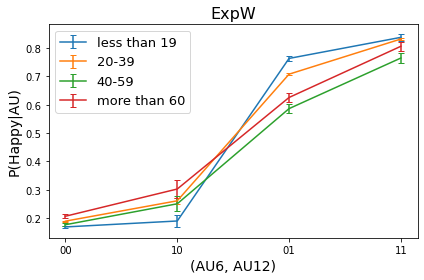

In [112]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('ExpW', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/ExpW_happy_4_all.pdf') 
plt.show()

In [25]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
31.708275013146704
6.02923896142471e-07

10
10.131104690515475
0.017483949940647836

01
109.21074400594628
0.0

11
20.41736883278834
0.0001390771562047588



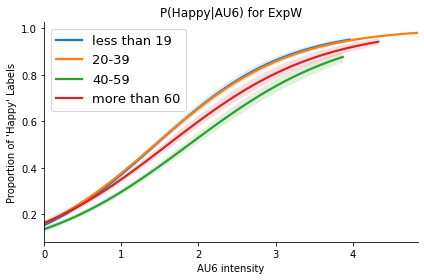

In [26]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-59', 'more than 60'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU6) for ExpW')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/ExpW_happy_4_AU6.pdf') 
plt.show()

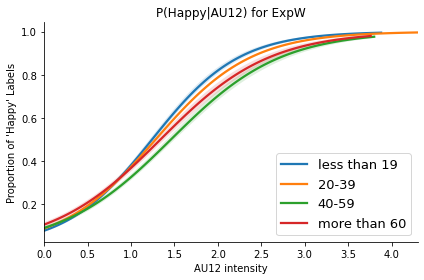

In [27]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-59', 'more than 60'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU12) for ExpW')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/ExpW_happy_4_AU12.pdf') 
plt.show()

In [28]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85349
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38638.
Date:                Sun, 08 Aug 2021   Deviance:                       77275.
Time:                        23:28:47   Pearson chi2:                 8.35e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3378    

# RAF-DB

In [80]:
frame = pd.read_csv('RAFDB_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(12214, 54)


,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


## Age Label

Notes:

In "train_XXXXX_manu_attri.txt" / "test_XXXX_manu_attri.txt", the first five lines contain location info (x, y) of 5 landmarks.
The next three lines presents information of gender, race and age attributes respectively:
	
Gender
    
0: male		1: female	2: unsure

Race	

0: Caucasian		1: African-American		2: Asian

Age (5 ranges)	

0: 0-3	 1: 4-19		2: 20-39		3: 40-69		4: 70+

In [84]:
from os import listdir
from os.path import isfile, join
mypath = 'RAF-DB/Basic_Emotion/Annotation/manual'
listdir(mypath)

['train_03396_manu_attri.txt',
 'train_04548_manu_attri.txt',
 'train_03383_manu_attri.txt',
 'test_0461_manu_attri.txt',
 'test_0474_manu_attri.txt',
 'train_11406_manu_attri.txt',
 'test_1490_manu_attri.txt',
 'train_11413_manu_attri.txt',
 'test_1485_manu_attri.txt',
 'train_06054_manu_attri.txt',
 'train_06041_manu_attri.txt',
 'test_2168_manu_attri.txt',
 'train_02367_manu_attri.txt',
 'train_08008_manu_attri.txt',
 'train_02372_manu_attri.txt',
 'train_00426_manu_attri.txt',
 'train_00433_manu_attri.txt',
 'test_0629_manu_attri.txt',
 'train_04715_manu_attri.txt',
 'train_04700_manu_attri.txt',
 'train_08255_manu_attri.txt',
 'train_08240_manu_attri.txt',
 'train_07900_manu_attri.txt',
 'test_2320_manu_attri.txt',
 'test_2335_manu_attri.txt',
 'train_07915_manu_attri.txt',
 'train_06209_manu_attri.txt',
 'train_09949_manu_attri.txt',
 'test_0075_manu_attri.txt',
 'test_0060_manu_attri.txt',
 'train_01966_manu_attri.txt',
 'train_01973_manu_attri.txt',
 'train_03782_manu_attri.txt

In [85]:
len(listdir(mypath))

15339

In [86]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(onlyfiles)

15339

In [87]:
for index, row in frame.iterrows():
    if index % 1000 == 0: print(index)
    name = row['ImageName'][:-12] + "_manu_attri.txt"
    myfile = open(mypath +"/" + name,"r") 
    frame.loc[index, "Age"] = int(myfile.readlines()[7][0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [88]:
frame

,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Age
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1.0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,train_12266_aligned.jpg,0,0.925,7,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
12210,train_12267_aligned.jpg,0,0.975,7,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1.0
12211,train_12268_aligned.jpg,0,0.875,7,0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0.0
12212,train_12269_aligned.jpg,0,0.975,7,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1.0


In [90]:
frame.to_csv('RAFDB_OpenFace_result_with_Emotion_and_Gender_Age.csv', index = False)

In [114]:
frame = frame.rename(columns={'Age': 'age_preds'})

In [115]:
frame.age_preds.value_counts()

2.0    6805
1.0    2103
3.0    1911
0.0    1102
4.0     293
Name: age_preds, dtype: int64

In [116]:
def map_age_RAFDB(age):
    if age == 0 or age == 1:
        return 0
    else:
        return age - 1

frame['Age'] = frame.age_preds.apply(map_age_RAFDB)
frame.Age.value_counts()

1.0    6805
0.0    3205
2.0    1911
3.0     293
Name: Age, dtype: int64

In [117]:
frame = frame.dropna()
frame.shape

(12214, 56)

In [118]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

11    6766
00    2619
10    1419
01    1410
Name: AU6and12_c, dtype: int64

In [119]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    8209
11    1881
01    1545
10     579
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [120]:
frame.Age.value_counts()

1.0    6805
0.0    3205
2.0    1911
3.0     293
Name: Age, dtype: int64

In [121]:
def map_age_RAF(num):
    if num == 0:
        return 'less than 19'
    elif num == 1:
        return '20-39'
    elif num == 2:
        return '40-69'
    else:
        return 'more than 70'

In [122]:
frame['age'] = frame['Age']
frame['Age'] = frame['age'].apply(map_age_RAF)
frame.Age.value_counts()

20-39           6805
less than 19    3205
40-69           1911
more than 70     293
Name: Age, dtype: int64

In [123]:
frame_0 = frame.loc[frame['age'] == 0]
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
frame_3 = frame.loc[frame['age'] == 3]
print(frame_0.shape)
print(frame_1.shape)
print(frame_2.shape)
print(frame_3.shape)

(3205, 59)
(6805, 59)
(1911, 59)
(293, 59)


In [124]:
frame_list = [frame_0, frame_1, frame_2, frame_3]
name_list = ['less than 19', '20-39', '40-69', 'more than 70']

## Happiness

In [125]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.3794071762870515 less than 19 3205
0.34019103600293904 20-39 6805
0.5363683935112507 40-69 1911
0.4334470989761092 more than 70 293


In [126]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.1453978159126365 less than 19 3205
0.1745775165319618 20-39 6805
0.3553113553113553 40-69 1911
0.4334470989761092 more than 70 293


In [127]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.23400936037441497 less than 19 3205
0.252608376193975 20-39 6805
0.43903715332286763 40-69 1911
0.40273037542662116 more than 70 293


In [128]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.769497  0.230503
01            0.141531  0.858469
10            0.680272  0.319728
11            0.163009  0.836991 less than 19 3205
Happy                0         1
AU6and12_r_c                    
00            0.831914  0.168086
01            0.162935  0.837065
10            0.820513  0.179487
11            0.143169  0.856831 20-39 6805
Happy                0         1
AU6and12_r_c                    
00            0.751317  0.248683
01            0.109541  0.890459
10            0.715447  0.284553
11            0.097122  0.902878 40-69 1911
Happy                0         1
AU6and12_r_c                    
00            0.870504  0.129496
01            0.259259  0.740741
10            0.750000  0.250000
11            0.120879  0.879121 more than 70 293


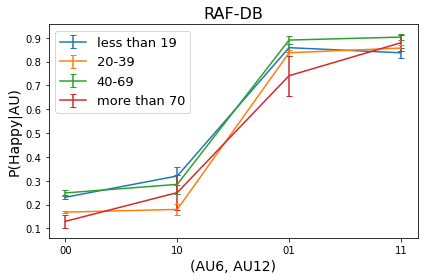

In [129]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('RAF-DB', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/RAFDB_happy_4_all.pdf') 
plt.show()

In [46]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
62.10650899064551
2.084998840246044e-13

10
11.890878401227116
0.007766467861248794

01
nan
nan

11
9.684054939318223
0.021451826917936012



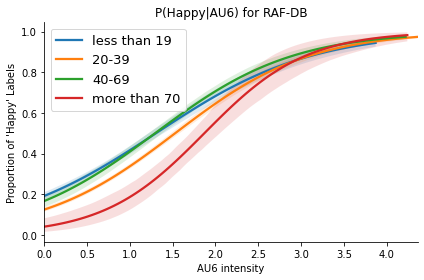

In [49]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-69', 'more than 70'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU6) for RAF-DB')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/RAFDB_happy_4_AU6.pdf')
plt.show()

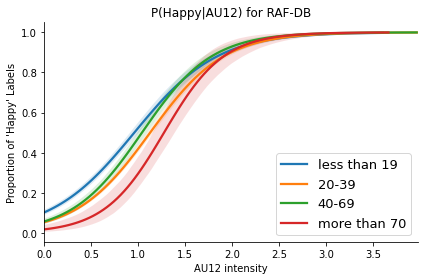

In [50]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-69', 'more than 70'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU12) for RAF-DB')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/RAFDB_happy_4_AU12.pdf')
plt.show()

In [51]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12208
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4478.7
Date:                Sun, 08 Aug 2021   Deviance:                       8957.5
Time:                        23:30:07   Pearson chi2:                 1.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.6499    

In [114]:
# Merge "more than 70" together with "40-69" since there are too few "more than 70"
new_frame2 = frame_2.append(frame_3)
new_frame2.age = 2
frame_list = [frame_0, frame_1, new_frame2]
name_list = ['less than 19', '20-39', 'more than 40']

In [116]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]
    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
51.104770713742106
7.993605777301127e-12

10
11.709517904484935
0.0028662264153013206

01
3.1294560822823274
0.20914488424368693

11
9.29846277824195
0.009568953906850752



# AffectNet Manual

In [130]:
frame = pd.read_csv('AffectNet_Manual_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(35694, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0002074f0d5dafbb7983d509964312d04c612d9d425577...,10,0,White,Female,60-69,[0.425075 0.02112318 0.25978056 0.00382649 0...,[0.09870926 0.9012907 ],[5.3278323e-05 5.1294203e-04 3.1685282e-03 2.4...,0,...,0,0,0,1,0,0,0,0,1,0
1,000bdb0a8f54725d1424bb38d626b1d8bf17f001ad2406...,8,0,Black,Male,20-29,[3.52906886e-06 9.99552011e-01 1.59864125e-04 ...,[9.9954259e-01 4.5739944e-04],[5.6344652e-07 4.1122996e-05 1.3004625e-02 6.6...,0,...,0,1,0,1,1,0,0,0,1,0
2,000c10a8f6735212d71eb54298bc47ea56dc08e64ed2ca...,0,0,White,Male,40-49,[9.3397456e-01 4.9433287e-04 3.7014667e-02 4.5...,[0.99797386 0.00202617],[8.6898144e-05 1.5486187e-04 2.0614783e-03 2.4...,0,...,0,0,0,1,0,0,0,0,0,0
3,000fb19bfc2f4d09e33b30ae5d1be4488297e7ff6f0011...,1,1,White,Male,40-49,[9.3484497e-01 2.3674322e-05 1.4515205e-02 1.9...,[9.9999887e-01 1.1556698e-06],[3.4171117e-06 7.4146001e-06 5.2725355e-04 4.3...,0,...,0,0,0,1,1,0,0,0,0,0
4,0010aaaebcdd6bae8f967dc0e471760f7a45e220125be3...,1,1,Middle Eastern,Male,20-29,[4.4076398e-02 7.8236350e-05 4.0029038e-02 3.7...,[9.9999958e-01 3.9027404e-07],[5.4735474e-06 8.7598469e-03 4.4977888e-01 4.5...,0,...,0,1,0,1,1,0,0,0,1,0


In [131]:
frame.age_preds.value_counts()

20-29           14527
30-39            5959
40-49            4495
50-59            3982
10-19            2066
60-69            2056
3-9              1204
0-2               771
more than 70      634
Name: age_preds, dtype: int64

In [132]:
frame = frame.dropna()
frame.shape

(35694, 59)

In [133]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    15395
11    12018
10     4277
01     4004
Name: AU6and12_c, dtype: int64

In [134]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    23289
01     6111
11     5431
10      863
Name: AU6and12_r_c, dtype: int64

In [135]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'AU6and12_c', 'AU6and12_r_c']


In [136]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 0
frame.loc[frame['age_preds'] == '3-9', 'age'] = 0
frame.loc[frame['age_preds'] == '10-19', 'age'] = 0
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 3
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 3
frame.age.value_counts()

1.0    20486
2.0     8477
0.0     4041
3.0     2690
Name: age, dtype: int64

In [137]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

20-39           20486
40-59            8477
less than 19     4041
more than 60     2690
Name: Age, dtype: int64

In [138]:
frame_0 = frame.loc[frame['age'] == 0]
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
frame_3 = frame.loc[frame['age'] == 3]
print(frame_0.shape)
print(frame_1.shape)
print(frame_2.shape)
print(frame_3.shape)

(4041, 63)
(20486, 63)
(8477, 63)
(2690, 63)


In [139]:
frame_list = [frame_0, frame_1, frame_2, frame_3]
name_list = ['less than 19', '20-39', '40-59', 'more than 60']

# P(expression|AU1, male) =? P(expression|AU1, female)

## Happiness

In [140]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.3422420193021529 less than 19 4041
0.3234892121448794 20-39 20486
0.2815854665565648 40-59 8477
0.28178438661710037 more than 60 2690


In [141]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.1311556545409552 less than 19 4041
0.15161573757688177 20-39 20486
0.22507962722661318 40-59 8477
0.2788104089219331 more than 60 2690


In [142]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.31130908191041823 less than 19 4041
0.3319828175339256 20-39 20486
0.309071605520821 40-59 8477
0.320817843866171 more than 60 2690


In [143]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.859031  0.140969
01            0.254130  0.745870
10            0.593220  0.406780
11            0.176221  0.823779 less than 19 4041
Happy                0         1
AU6and12_r_c                    
00            0.894325  0.105675
01            0.302885  0.697115
10            0.758755  0.241245
11            0.160758  0.839242 20-39 20486
Happy                0         1
AU6and12_r_c                    
00            0.921701  0.078299
01            0.400917  0.599083
10            0.775132  0.224868
11            0.202614  0.797386 40-59 8477
Happy                0         1
AU6and12_r_c                    
00            0.922195  0.077805
01            0.475177  0.524823
10            0.727811  0.272189
11            0.251291  0.748709 more than 60 2690


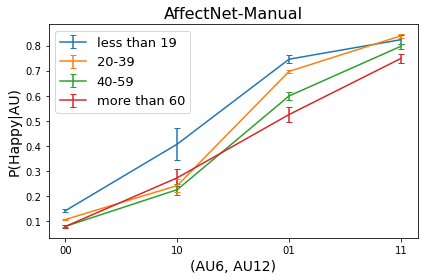

In [144]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('AffectNet-Manual', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/AffectNet_Manual_happy_4_all.pdf') 
plt.show()

In [67]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
91.73766895714971
0.0

10
9.510393557652929
0.02322104710544448

01
84.61644409661668
0.0

11
31.54246253324697
6.534248858658387e-07



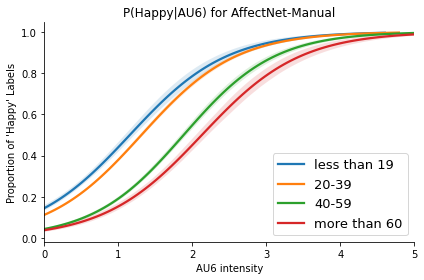

In [68]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-59', 'more than 60'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU6) for AffectNet-Manual')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/AffectNet_Manual_happy_4_AU6.pdf')
plt.show()

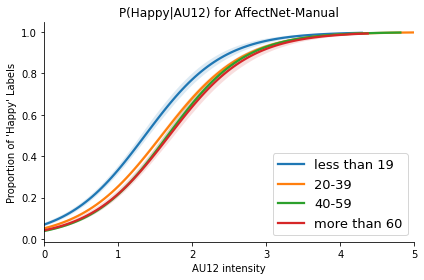

In [69]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-59', 'more than 60'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU12) for AffectNet-Manual')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/AffectNet_Manual_happy_4_AU12.pdf')
plt.show()

In [70]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35688
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12844.
Date:                Sun, 08 Aug 2021   Deviance:                       25688.
Time:                        23:31:27   Pearson chi2:                 3.68e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.9564    

# AffectNet Automatic

In [145]:
frame = pd.read_csv('AffectNet_Automatic_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(42284, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0000278c7363d43c42a4db994a51e36aad351f55e77680...,10,0,White,Female,40-49,[9.7449505e-01 5.2814976e-06 5.5093807e-03 4.6...,[7.1670633e-04 9.9928331e-01],[2.2580596e-07 1.7767234e-06 2.0319392e-04 2.8...,0,...,0,0,0,1,0,0,0,0,1,0
1,0000fa4e4ffdc2a6042a0eadf8a2d067774705ba17721a...,10,0,East Asian,Female,20-29,[1.9185199e-01 7.3396941e-06 1.9742842e-03 7.8...,[6.5521155e-05 9.9993443e-01],[1.48235313e-06 3.44420609e-04 2.11575143e-02 ...,0,...,0,0,0,0,0,0,0,0,1,0
2,00017248a05758584faf54d4ccdb23d5365a5bfc3e3aee...,0,0,Black,Female,30-39,[2.06290515e-05 9.99178529e-01 1.19858145e-04 ...,[0.00982992 0.9901701 ],[1.80382315e-07 2.75580824e-05 3.95781221e-03 ...,0,...,0,0,0,0,0,0,0,0,0,0
3,000364dc26143c95e73e8dca30c0f3730db84c295c0b48...,1,1,East Asian,Female,20-29,[9.0016201e-03 2.3799853e-06 2.5050717e-03 9.5...,[6.7393144e-06 9.9999321e-01],[1.0476051e-07 6.7055156e-04 1.7963018e-01 8.1...,0,...,0,0,0,0,1,0,0,0,0,0
4,0003a7c1e380e87c864436434115f656c92b695e384f88...,10,0,White,Female,20-29,[0.60690844 0.01389638 0.2529639 0.00064708 0...,[0.00108382 0.9989162 ],[9.6977169e-07 3.5300865e-04 4.1254394e-02 6.1...,0,...,0,0,0,1,0,1,0,0,0,0


In [146]:
frame.age_preds.value_counts()

20-29           17646
30-39            6465
40-49            4580
50-59            3852
10-19            2724
3-9              2396
60-69            2099
0-2              1756
more than 70      766
Name: age_preds, dtype: int64

In [147]:
frame = frame.dropna()
frame.shape

(42284, 59)

In [148]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    18398
11    14291
01     5093
10     4502
Name: AU6and12_c, dtype: int64

In [149]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    27828
01     7198
11     6392
10      866
Name: AU6and12_r_c, dtype: int64

In [150]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'AU6and12_c', 'AU6and12_r_c']


In [151]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 0
frame.loc[frame['age_preds'] == '3-9', 'age'] = 0
frame.loc[frame['age_preds'] == '10-19', 'age'] = 0
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 3
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 3
frame.age.value_counts()

1.0    24111
2.0     8432
0.0     6876
3.0     2865
Name: age, dtype: int64

In [152]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

20-39           24111
40-59            8432
less than 19     6876
more than 60     2865
Name: Age, dtype: int64

In [153]:
frame_0 = frame.loc[frame['age'] == 0]
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
frame_3 = frame.loc[frame['age'] == 3]
print(frame_0.shape)
print(frame_1.shape)
print(frame_2.shape)
print(frame_3.shape)

(6876, 63)
(24111, 63)
(8432, 63)
(2865, 63)


In [154]:
frame_list = [frame_0, frame_1, frame_2, frame_3]
name_list = ['less than 19', '20-39', '40-59', 'more than 60']

# P(expression|AU1, male) =? P(expression|AU1, female)

## Happiness

In [155]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.43702734147760325 less than 19 6876
0.4232922732362822 20-39 24111
0.39385673624288425 40-59 8432
0.3787085514834206 more than 60 2865


In [156]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.1243455497382199 less than 19 6876
0.1523785823897806 20-39 24111
0.22509487666034156 40-59 8432
0.2900523560209424 more than 60 2865


In [157]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.2977021524141943 less than 19 6876
0.33540707560864336 20-39 24111
0.30787476280834913 40-59 8432
0.30017452006980805 more than 60 2865


In [158]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.756470  0.243530
01            0.133129  0.866871
10            0.408696  0.591304
11            0.113514  0.886486 less than 19 6876
Happy                0         1
AU6and12_r_c                    
00            0.815651  0.184349
01            0.142031  0.857969
10            0.572549  0.427451
11            0.068441  0.931559 20-39 24111
Happy                0         1
AU6and12_r_c                    
00            0.840108  0.159892
01            0.177618  0.822382
10            0.565217  0.434783
11            0.068434  0.931566 40-59 8432
Happy                0         1
AU6and12_r_c                    
00            0.847059  0.152941
01            0.289157  0.710843
10            0.563636  0.436364
11            0.117840  0.882160 more than 60 2865


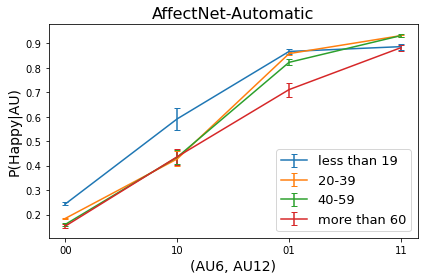

In [159]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('AffectNet-Automatic', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/AffectNet_Automatic_happy_4_all.pdf') 
plt.show()

In [86]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
139.99565985214625
0.0

10
10.1590943912507
0.01726107619412176

01
48.79615797542901
1.4415280080726234e-10

11
32.71201165660203
3.704124640346862e-07



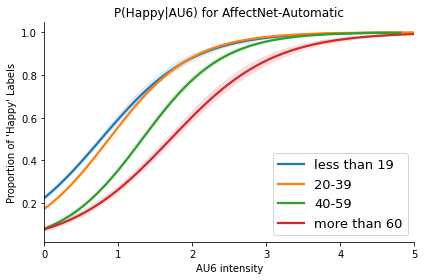

In [87]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-59', 'more than 60'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU6) for AffectNet-Automatic')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/AffectNet_Automatic_happy_4_AU6.pdf')
plt.show()

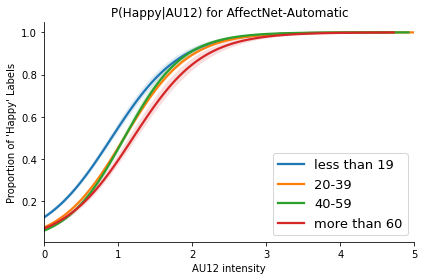

In [88]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 19', '20-39', '40-59', 'more than 60'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity")
plt.ylabel("Proportion of 'Happy' Labels")
plt.title('P(Happy|AU12) for AffectNet-Automatic')
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_4_groups_graphs/AffectNet_Automatic_happy_4_AU12.pdf')
plt.show()

In [89]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42278
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15446.
Date:                Sun, 08 Aug 2021   Deviance:                       30892.
Time:                        23:33:00   Pearson chi2:                 7.47e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.5031    

# KDEF

In [162]:
frame = pd.read_csv('KDEF_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(2926, 54)


,ImageName,face,confidence,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,...,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Emotion,Happy,Gender
0,AF01AFHL.jpg,0,0.475,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,AF,0,F
1,AF01AFHR.jpg,0,0.975,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
2,AF01AFS.jpg,0,0.975,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
3,AF01ANHL.jpg,0,0.425,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,AN,0,F
4,AF01ANHR.jpg,0,0.575,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,AN,0,F


In [163]:
frame = frame[frame.ImageName.apply(lambda x: x[6] == 'S')]
frame.shape

(974, 54)

In [164]:
print(list(frame.columns))

['ImageName', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Emotion', 'Happy', 'Gender']


In [165]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [166]:
frame = frame.dropna()
frame.shape

(974, 54)

KDEF does not have age information.

# Chicago Face

In [202]:
frame = pd.read_csv('ChicagoFace_with_AU_cleanedup_with_age.csv')
print(frame.shape)
frame.head()

(1207, 56)


,ImageName,Gender,Race,age_preds,age_scores,Expression,face,confidence,AU01_r,AU02_r,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,CFD-WM-239-128-N.jpg,M,W,20-29,[0.00654973 0.1297859 0.2645277 0.3455049 0...,Neutral,0,0.975,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0
1,CFD-BM-219-141-N.jpg,M,B,10-19,[3.3371706e-04 6.9808856e-02 4.1271898e-01 4.0...,Neutral,0,0.975,1.69,1.28,...,0,0,0,0,0,1,0,0,1,0
2,CFD-WF-034-016-A.jpg,F,W,10-19,[6.0925126e-04 1.1392238e-01 5.5542862e-01 2.6...,Angry,0,0.975,1.30,0.02,...,0,0,0,1,0,0,0,0,0,0
3,CFD-BM-030-065-F.jpg,M,B,3-9,[0.01531033 0.32719353 0.21216927 0.20949404 0...,Fear,0,0.975,2.90,4.65,...,0,0,0,1,1,0,0,0,1,0
4,CFD-LM-237-264-N.jpg,M,L,40-49,[0.00132091 0.04711869 0.14649853 0.13941625 0...,Neutral,0,0.975,1.01,0.21,...,0,0,0,1,0,0,0,0,0,0


In [203]:
frame['Angry'] = (frame['Expression'] =='Angry').astype(int)
frame['Fear'] = (frame['Expression'] == 'Fear').astype(int)
frame['Happy'] = (frame['Expression'] =='Happy').astype(int)
frame['Neutral'] = (frame['Expression'] == 'Neutral').astype(int)

In [204]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    650
11    345
01    158
10     54
Name: AU6and12_c, dtype: int64

In [205]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    784
11    274
01    136
10     13
Name: AU6and12_r_c, dtype: int64

In [206]:
frame.age_preds.value_counts()

20-29           676
10-19           422
3-9              69
40-49            19
30-39            14
60-69             6
more than 70      1
Name: age_preds, dtype: int64

In [207]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 0
frame.loc[frame['age_preds'] == '3-9', 'age'] = 0
frame.loc[frame['age_preds'] == '10-19', 'age'] = 0
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 3
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 3
frame.age.value_counts()

1.0    690
0.0    491
2.0     19
3.0      7
Name: age, dtype: int64

In [208]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

20-39           690
less than 19    491
40-59            19
more than 60      7
Name: Age, dtype: int64

CFD has too few data for age analysis.